In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

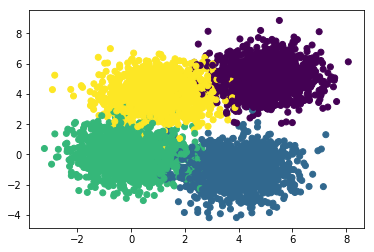

In [15]:
centers = [[5,5], [4,-1], [0,0], [1,4]]
X, y = make_blobs(n_samples=5000, centers=centers,
        cluster_std=1, n_features=2, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X,y,
                test_size=.9, random_state=42)

Number of estimated Clusters:  4


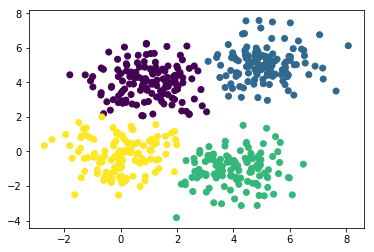

In [16]:
#Using Mean-Shift
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_

cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print('Number of estimated Clusters: ', n_clusters_)

plt.scatter(X_train[:,0], X_train[:,1], c=labels)
plt.show()

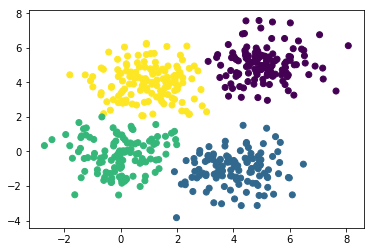

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      125    0    0    3
1        0  117    2    0
2        0    4  111    2
3        0    0    3  133


In [17]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4)
sc.fit(X_train)
predict=sc.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [18]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = af.labels_
print('Estimated number of clusters: {}'.format(n_clusters_))


Estimated number of clusters: 4


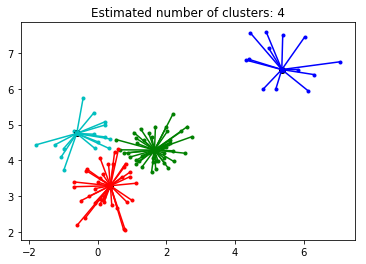

In [19]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()